In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

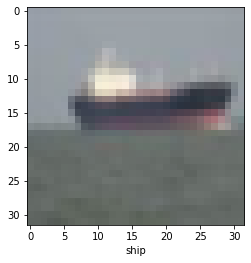

In [4]:
IMG_INDEX = 69  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.5330 - accuracy: 0.4384 - val_loss: 1.3444 - val_accuracy: 0.5158
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1622 - accuracy: 0.5865 - val_loss: 1.0459 - val_accuracy: 0.6247
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.0143 - accuracy: 0.6428 - val_loss: 1.0794 - val_accuracy: 0.6226
Epoch 4/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.9170 - accuracy: 0.6788 - val_loss: 0.9400 - val_accuracy: 0.6740
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8488 - accuracy: 0.7020 - val_loss: 0.8994 - val_accuracy: 0.6864
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7855 - accuracy: 0.7230 - val_loss: 0.8718 - val_accuracy: 0.6976
Epoch 7/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.7377 - accuracy: 0.7416 - val_loss: 0.8435 -

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.9002 - accuracy: 0.7025 - 3s/epoch - 11ms/step
0.7024999856948853
